<a href="https://colab.research.google.com/github/KayalvizhiT513/Gradient_Descent_Comparison/blob/main/SGD_Adadelta_%26_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. Adadelta**

In [1]:
import numpy as np
import csv

# Step 1: Initialize weights and learning rate
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.01

# Step 2: Load data from CSV file
data = np.genfromtxt('randXY.csv', delimiter=',', skip_header=1)  # Adjust the filename accordingly

# Extract X and Y from the loaded data
X = data[:, 0]  # Assuming the first column is X
Y = data[:, 1]  # Assuming the second column is Y

print("Initial w0: ", w_0, "\n Initial w1: ", w_1)

Initial w0:  0.8260560647266798 
 Initial w1:  0.5782539087214469


In [2]:
def percentage_difference(value1, value2):
    return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100

In [3]:
import matplotlib.pyplot as plt

# Function to plot epoch vs. loss
def plot_loss_vs_epoch(loss_history, algorithm_name):
    plt.plot(range(len(loss_history)), loss_history, label=algorithm_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{algorithm_name} - Epoch vs. Loss')
    plt.legend()
    plt.show()

In [4]:
from math import sqrt

def update_w_with_adadelta(w, learning_rate, a, gradient_w, e = 1e-8):
    # Update learning_rate
    learning_rate = learning_rate / sqrt(a + e)
    print(learning_rate)
    # Update w0
    w = w - (learning_rate * gradient_w)

    return w, learning_rate

In [5]:
# Step 3: Define SGD function
def sgd_one_sample(X, Y, w0, w1, learning_rate, epochs=6000, tol=1, consecutive_instances=10):
    n = len(X)
    prev_loss = float('inf')
    count = 0
    a = 0
    b = 0.9 # Initailize beta value

    # Initialize previous gradients and accumulators
    learning_rate_w0 = 0.01
    learning_rate_w1 = 0.01
    a_w0 = 0.0
    a_w1 = 0.0

    for epoch in range(epochs):
        for i in range(n):
            # Select one random data point
            random_index = np.random.randint(0, n)
            x_i = X[random_index]
            y_i = Y[random_index]

            # Calculate prediction and loss for the selected point
            prediction = w0 + w1 * x_i
            loss = (y_i - prediction)**2

            # Calculate gradients
            gradient_w0 = -2 * (y_i - prediction)
            gradient_w1 = -2 * (y_i - prediction) * x_i

            # Update weights
            w0, learning_rate_w0 = update_w_with_adadelta(w0, learning_rate_w0, a_w0, gradient_w0)
            w1, learning_rate_w1 = update_w_with_adadelta(w1, learning_rate_w1, a_w1, gradient_w1)

            # Update a for next iteration
            a_w0 = (b * a_w0) + ((1-b) * gradient_w0**2)
            a_w1 = (b * a_w1) + ((1-b) * gradient_w1**2)

            if learning_rate_w0 == 0 and learning_rate_w1 == 0:
              break


        # Calculate overall loss for monitoring
        predictions = w0 + w1 * X
        overall_loss = np.mean((Y - predictions)**2)

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            #print(f"learning_rate_w0: {learning_rate_w0}, learning_rate_w1: {learning_rate_w1}")
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # the model will stop learning as the learning rate is 0
        if learning_rate_w0 == 0 or learning_rate_w1 == 0:
            print(f"learning_rate_w0: {learning_rate_w0}, learning_rate_w1: {learning_rate_w1}")
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            break

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ", count)
            break

        # Append loss to the history
        loss_history_sgd_one_sample.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1

# Step 4: Run SGD with one training sample at a time
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.01
loss_history_sgd_one_sample = []
w0_sgd_one_sample, w1_sgd_one_sample = sgd_one_sample(X, Y, w_0, w_1, learning_rate)
print(f"Final weights for SGD with one sample: w0={w0_sgd_one_sample}, w1={w1_sgd_one_sample}")

100.0
100.0
30.70922152971555
126.91158834337378
0.03912417454876936
0.18383999421088468
1.7817450643852833e-07
8.52045411051198e-07
8.397074541720117e-13
4.16171909282052e-12
3.8678475582950115e-18
2.0914568696985448e-17
1.6329456282730115e-23
9.664103130843143e-23
6.825244712855594e-29
4.600680657104483e-28
2.885920312308647e-34
2.29065283297224e-33
1.1457619995544819e-39
1.0632511059890597e-38
4.391400240841075e-45
4.832997780622762e-44
1.6686408915331852e-50
2.2389029878040393e-49
6.037038488148441e-56
9.645649484978806e-55
2.1249251695798666e-61
4.053363004366005e-60
7.34304480379859e-67
1.6864510157930858e-65
2.617822623567213e-72
7.377276202428784e-71
9.247033510318751e-78
3.2508991572741046e-76
3.172532482854852e-83
1.3742754894953283e-81
1.0583787571637024e-88
5.564040001083501e-87
3.516375148966017e-94
2.274438312658644e-92
1.2024439393230237e-99
9.75807842996565e-98
4.114841885106115e-105
4.2643524009250753e-103
1.450808802028742e-110
1.9572812334988363e-108
5.27334268567010

<ipython-input-2-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


# **4. Adam optimizer**

In [7]:
from math import sqrt

def update_learning_rate_with_adam(learning_rate, a, e = 1e-8):
    # Update learning_rate
    learning_rate = learning_rate / sqrt(a + e)
    #print(learning_rate)

    return learning_rate

In [8]:
def update_w_with_momentum(w, learning_rate, prev_gradient_w, gradient_w, beta = 0.9):
    # Update velocity
    velocity = (beta * prev_gradient_w) + ((1 - beta) * gradient_w)

    # Update w0
    w = w - (learning_rate * velocity)

    return w, velocity

In [11]:
# Step 3: Define SGD function
def sgd_one_sample(X, Y, w0, w1, learning_rate, epochs=6000, tol=1, consecutive_instances=10):
    n = len(X)
    prev_loss = float('inf')
    count = 0
    a = 0
    b = 0.9 # Initailize beta value

    # Initialize previous gradients
    prev_gradient_w0 = 0.0
    prev_gradient_w1 = 0.0

    # Initialize previous gradients and accumulators
    learning_rate_w0 = 0.01
    learning_rate_w1 = 0.01
    a_w0 = 0.0
    a_w1 = 0.0

    for epoch in range(epochs):
        for i in range(n):
            # Select one random data point
            random_index = np.random.randint(0, n)
            x_i = X[random_index]
            y_i = Y[random_index]

            # Calculate prediction and loss for the selected point
            prediction = w0 + w1 * x_i
            loss = (y_i - prediction)**2

            # Calculate gradients
            gradient_w0 = -2 * (y_i - prediction)
            gradient_w1 = -2 * (y_i - prediction) * x_i

            # Update learning_rate
            learning_rate_w0 = update_learning_rate_with_adam(learning_rate_w0, a_w0)
            learning_rate_w1 = update_learning_rate_with_adam(learning_rate_w1, a_w1)

            # Update weights
            w0, gradient_w0 = update_w_with_momentum(w0, learning_rate, prev_gradient_w0, gradient_w0)
            w1, gradient_w1 = update_w_with_momentum(w1, learning_rate, prev_gradient_w1, gradient_w1)

            # Update previous gradient for next iteration
            prev_gradient_w0 = gradient_w0
            prev_gradient_w1 = gradient_w1

            # Update a for next iteration
            a_w0 = (b * a_w0) + ((1-b) * gradient_w0**2)
            a_w1 = (b * a_w1) + ((1-b) * gradient_w1**2)

            if learning_rate_w0 == 0 and learning_rate_w1 == 0:
              break


        # Calculate overall loss for monitoring
        predictions = w0 + w1 * X
        overall_loss = np.mean((Y - predictions)**2)

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
          count += 1
        else:
          count = 0

        # Print loss for monitoring
        if epoch % 500 == 0:
            #print(f"learning_rate_w0: {learning_rate_w0}, learning_rate_w1: {learning_rate_w1}")
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        # the model will stop learning as the learning rate is 0
        if learning_rate_w0 == 0 or learning_rate_w1 == 0:
            print(f"learning_rate_w0: {learning_rate_w0}, learning_rate_w1: {learning_rate_w1}")
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            break

        # Update the stopping criteria to consider non-inf values
        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged! ", count)
            break

        # Append loss to the history
        loss_history_sgd_one_sample.append(overall_loss)

        # Update previous loss for the next iteration
        prev_loss = overall_loss

    return w0, w1

# Step 4: Run SGD Adam
w_0 = 0.8260560647266798
w_1 = 0.5782539087214469
learning_rate = 0.01
loss_history_sgd_one_sample = []
w0_sgd_one_sample, w1_sgd_one_sample = sgd_one_sample(X, Y, w_0, w_1, learning_rate)
print(f"Final weights for SGD with one sample: w0={w0_sgd_one_sample}, w1={w1_sgd_one_sample}")

<ipython-input-2-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


Epoch 0, Loss: 0.03934092560882483
Epoch 500, Loss: 0.021586422209138506
Epoch 677, Loss: 0.021147818654493576
Converged!  10
Final weights for SGD with one sample: w0=4.769235094450262, w1=4.9932411871183415


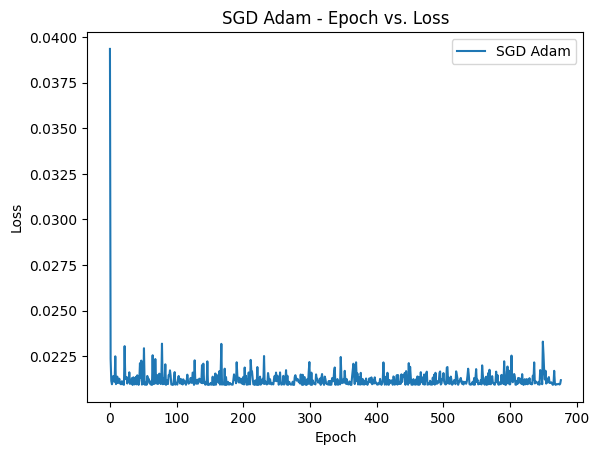

In [13]:
# Plot the loss vs. epoch graph for SGD with one sample
plot_loss_vs_epoch(loss_history_sgd_one_sample, 'SGD Adam')